# 3次元座標系

In [1]:
exec(open('/choreonoid_ws/install/share/irsl_choreonoid/sample/irsl_import.py').read())

## 3次元位置
`numpy.array([x,y,z])` として3次元のベクトルを作ります。

`from numpy import array as npa` となっているので `npa` と書けます。

または、`fv(x, y, z)` が `numpy.array([x, y, z])` となります。

In [2]:
pos = fv(1, 2, 3)

In [3]:
pos

array([1, 2, 3])

In [4]:
v0 = fv(1, 1, 0)
v1 = fv(2, 2, -2)

### ベクトルの足し算

In [5]:
v0 + v1

array([ 3,  3, -2])

### スカラー積

In [6]:
3 * v0

array([3, 3, 0])

## 3次元の回転
3次元の回転は3x3行列で表されます。

3要素のリスト３つのリストとして 3x3行列を作ります。

In [7]:
rot = fv([1,0,0],[0,1,0],[0,0,1])

In [8]:
rot

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

### クオータニオン

In [9]:
q = IC.rotationToQuaternion(rot)

In [10]:
q

array([0., 0., 0., 1.])

### AngleAxis
軸周りの回転

coordinatex.X, coordinatex.Y, coordinatex.Z はそれぞれ、x軸,y軸,z軸を表す3次元ベクトルです。
[1, 0, 0]軸 (x軸) の周りに pi/3 [radian] 回転させる

In [11]:
arot = IC.angleAxisNormalized(PI/3, coordinates.X)

In [12]:
PI

3.141592653589793

In [13]:
arot

array([[ 1.       ,  0.       ,  0.       ],
       [ 0.       ,  0.5      , -0.8660254],
       [ 0.       ,  0.8660254,  0.5      ]])

### ベクトルの回転

Matrix(3x3) x vector(1x3)

Matrix.dot(vector)

In [14]:
arot.dot(v1)

array([2.        , 2.73205081, 0.73205081])

## 3次元の座標系
以下の資料を参照してください。

[3次元座標系の説明](https://irsl-tut.github.io/irsl_documents/ja/coordinates.html)

[pythonでのcoordinatesの使い方](https://irsl-tut.github.io/irsl_documents/ja/module_cnoid_irslcoords.html#class-cnoid-irslcoords-coordinates)

### 座標系の生成

In [15]:
cds = coordinates(pos, rot)

In [16]:
cds

<coordinates[0x55813c518d20] 1 2 3 / 0 0 0 1 >

In [17]:
c0=cds
c0 is cds

True

In [18]:
c1 = coordinates(pos, rot)

In [19]:
c1

<coordinates[0x55813c4efa00] 1 2 3 / 0 0 0 1 >

In [20]:
c0.equal(c1, 1e-20)

True

coordinatesの表示は <coordinates[address] x y z / qx qy qz qw> となっています。

x, y, zは3次元の位置、qx, qy, qz, qw は回転を表すクオータニオンです。

In [21]:
cds.rot = arot

In [22]:
cds

<coordinates[0x55813c518d20] 1 2 3 / 0.5 0 0 0.866025 >

### 座標系のデータアクセス

In [69]:
cds.pos

array([1., 2., 3.])

In [70]:
cds.rot

array([[ 1.       ,  0.       ,  0.       ],
       [ 0.       ,  0.5      , -0.8660254],
       [ 0.       ,  0.8660254,  0.5      ]])

In [71]:
cds.getRPY()

array([ 1.04719755, -0.        ,  0.        ])

In [72]:
cds.quaternion

array([0.5      , 0.       , 0.       , 0.8660254])

In [73]:
cds.getRotationAngle()

array([1.        , 0.        , 0.        , 1.04719755])

### 座標系の移動

In [23]:
cds2 = coordinates()

In [24]:
cds2.translate(fv(0, 1, 0))

<coordinates[0x55813c2995e0] 0 1 0 / 0 0 0 1 >

### 座標系の回転

In [25]:
cds2.rotate(PI/3, coordinates.X)

<coordinates[0x55813c2995e0] 0 1 0 / 0.5 0 0 0.866025 >

### 同次変換行列(Homogeneous transformation matrix)
```
T = | Rot p |
    | 0   1 |
```

In [26]:
cds2.cnoidPosition

array([[ 1.       ,  0.       ,  0.       ,  0.       ],
       [ 0.       ,  0.5      , -0.8660254,  1.       ],
       [ 0.       ,  0.8660254,  0.5      ,  0.       ],
       [ 0.       ,  0.       ,  0.       ,  1.       ]])

### 同次変換行列の計算
T1, T2は以下のようになります。
```
T1 = | R1 p1 |
     | 0   1 |
```

```
T2 = | R2 p2 |
     | 0   1 |
```

T1とT2の掛け算は以下のようになります。
```
T1 * T2  = | R1R2  R1p2 + p1 |
           |    0      1     |
```


In [27]:
Rot1 = IC.angleAxisNormalized( PI/3, coordinates.X)
Rot2 = IC.angleAxisNormalized(-PI/4, coordinates.Y)
pos1 = fv( 1,  2,  3)
pos2 = fv(-3, -1, -2)
cds1 = coordinates(pos1, Rot1)
cds2 = coordinates(pos2, Rot2)

In [28]:
cds1.cnoidPosition

array([[ 1.       ,  0.       ,  0.       ,  1.       ],
       [ 0.       ,  0.5      , -0.8660254,  2.       ],
       [ 0.       ,  0.8660254,  0.5      ,  3.       ],
       [ 0.       ,  0.       ,  0.       ,  1.       ]])

In [29]:
cds2.cnoidPosition

array([[ 0.70710678,  0.        , -0.70710678, -3.        ],
       [ 0.        ,  1.        ,  0.        , -1.        ],
       [ 0.70710678,  0.        ,  0.70710678, -2.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [30]:
cds1.cnoidPosition.dot(cds2.cnoidPosition)

array([[ 0.70710678,  0.        , -0.70710678, -2.        ],
       [-0.61237244,  0.5       , -0.61237244,  3.23205081],
       [ 0.35355339,  0.8660254 ,  0.35355339,  1.1339746 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [31]:
Rot1.dot(Rot2)

array([[ 0.70710678,  0.        , -0.70710678],
       [-0.61237244,  0.5       , -0.61237244],
       [ 0.35355339,  0.8660254 ,  0.35355339]])

In [32]:
Rot1.dot(pos2) + pos1

array([-2.        ,  3.23205081,  1.1339746 ])

In [33]:
cds_a = coordinates(Rot1.dot(pos2) + pos1, Rot1.dot(Rot2))

In [34]:
cds_b = cds1.copy().transform(cds2)

In [35]:
cds_a

<coordinates[0x55813c4886a0] -2 3.23205 1.13397 / 0.46194 -0.331414 -0.191342 0.800103 >

In [36]:
cds_b

<coordinates[0x55813c4805c0] -2 3.23205 1.13397 / 0.46194 -0.331414 -0.191342 0.800103 >

In [37]:
cds_a.equal(cds_b)

True

In [38]:
cds_a.cnoidPosition

array([[ 0.70710678,  0.        , -0.70710678, -2.        ],
       [-0.61237244,  0.5       , -0.61237244,  3.23205081],
       [ 0.35355339,  0.8660254 ,  0.35355339,  1.1339746 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

## 座標系の表示

### 表示用のオブジェクト
DrawInterfaceを使う。

`from irsl_choreonoid.draw_coords import GeneralDrawInterfaceWrapped as DrawInterface` とインポートされている。

mkshapes.makeCoords(coords, length, lineWidth) で表示用のオブジェクトを作成。

lengthは矢印の長さ[m], lineWidthは矢印の太さ[pixel] となっています。

In [39]:
di = DrawInterface()

### addCoords 表示座標の追加

In [40]:
c_org = mkshapes.makeCoords(length = 0.5, lineWidth=5)

In [41]:
c_cds2 = mkshapes.makeCoords(coords=cds2, length = 0.5, lineWidth=5)

In [42]:
di.addObjects((c_org, c_cds2))

### 画面のファイル化
`%display` とすると、表示画面がnotebookにダウンロードできます。

これはpythonのコマンドではありません。

本講義のchoreonoidを使ったjupyterのみで使えるコマンドです。

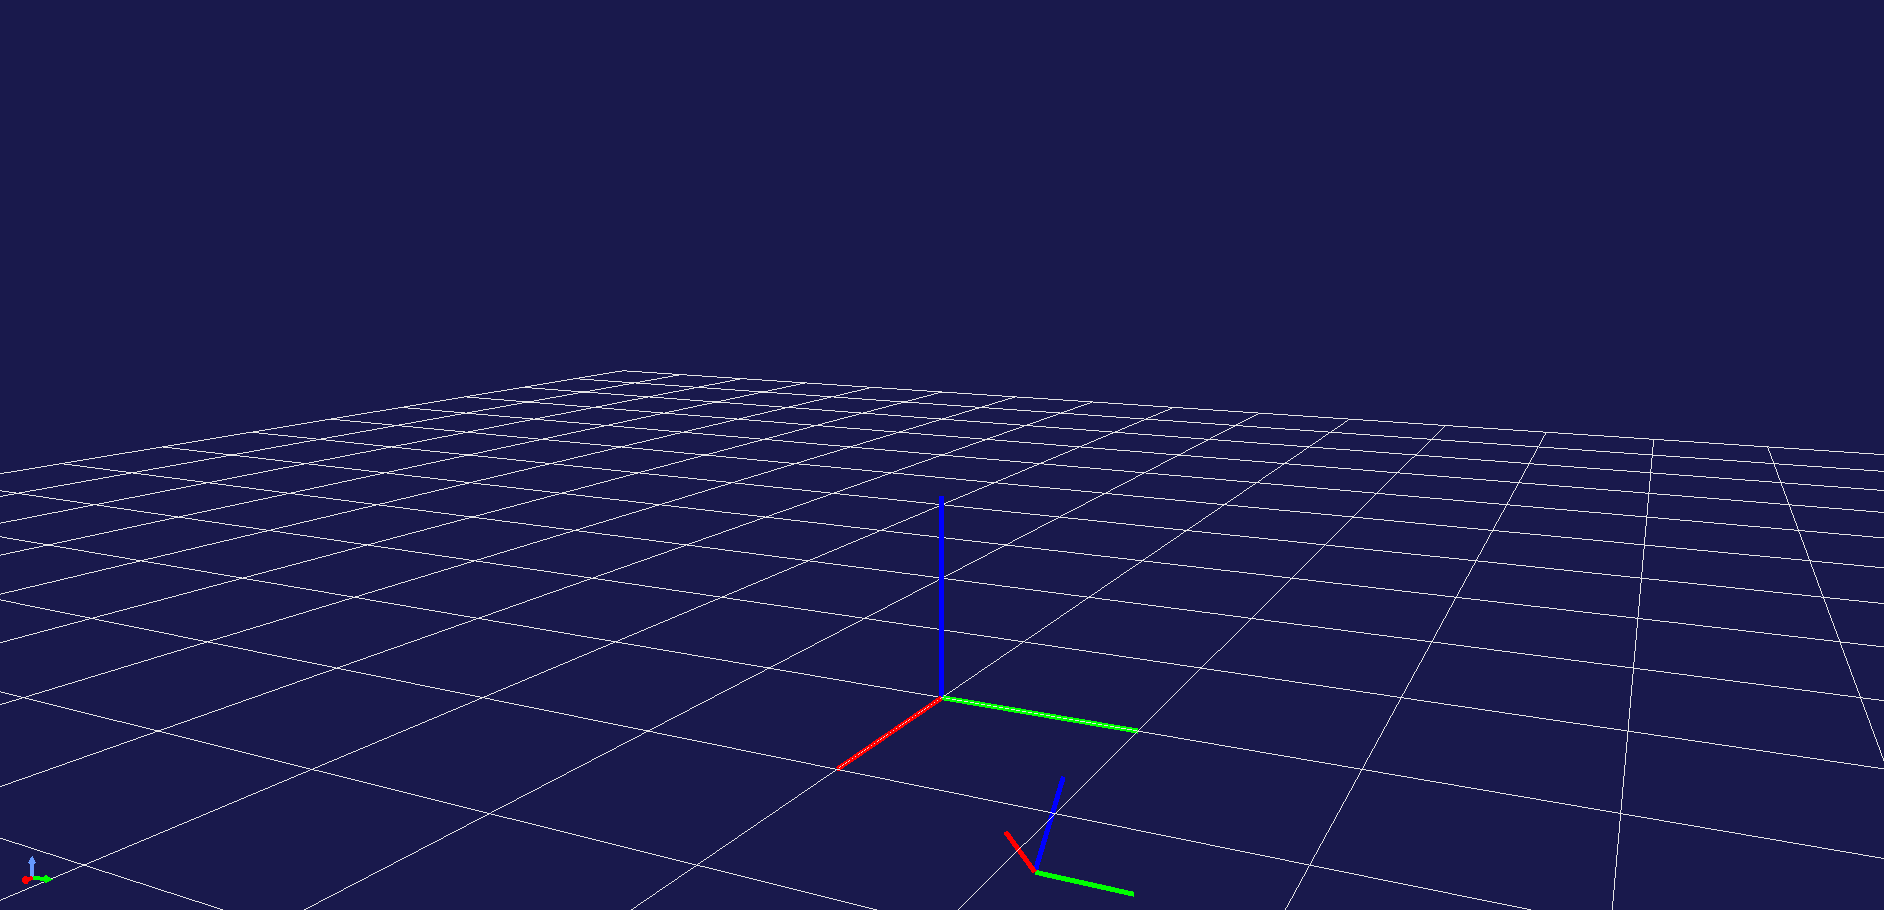

In [43]:
%display

### 座標系の表示を消す

In [44]:
di.clear()

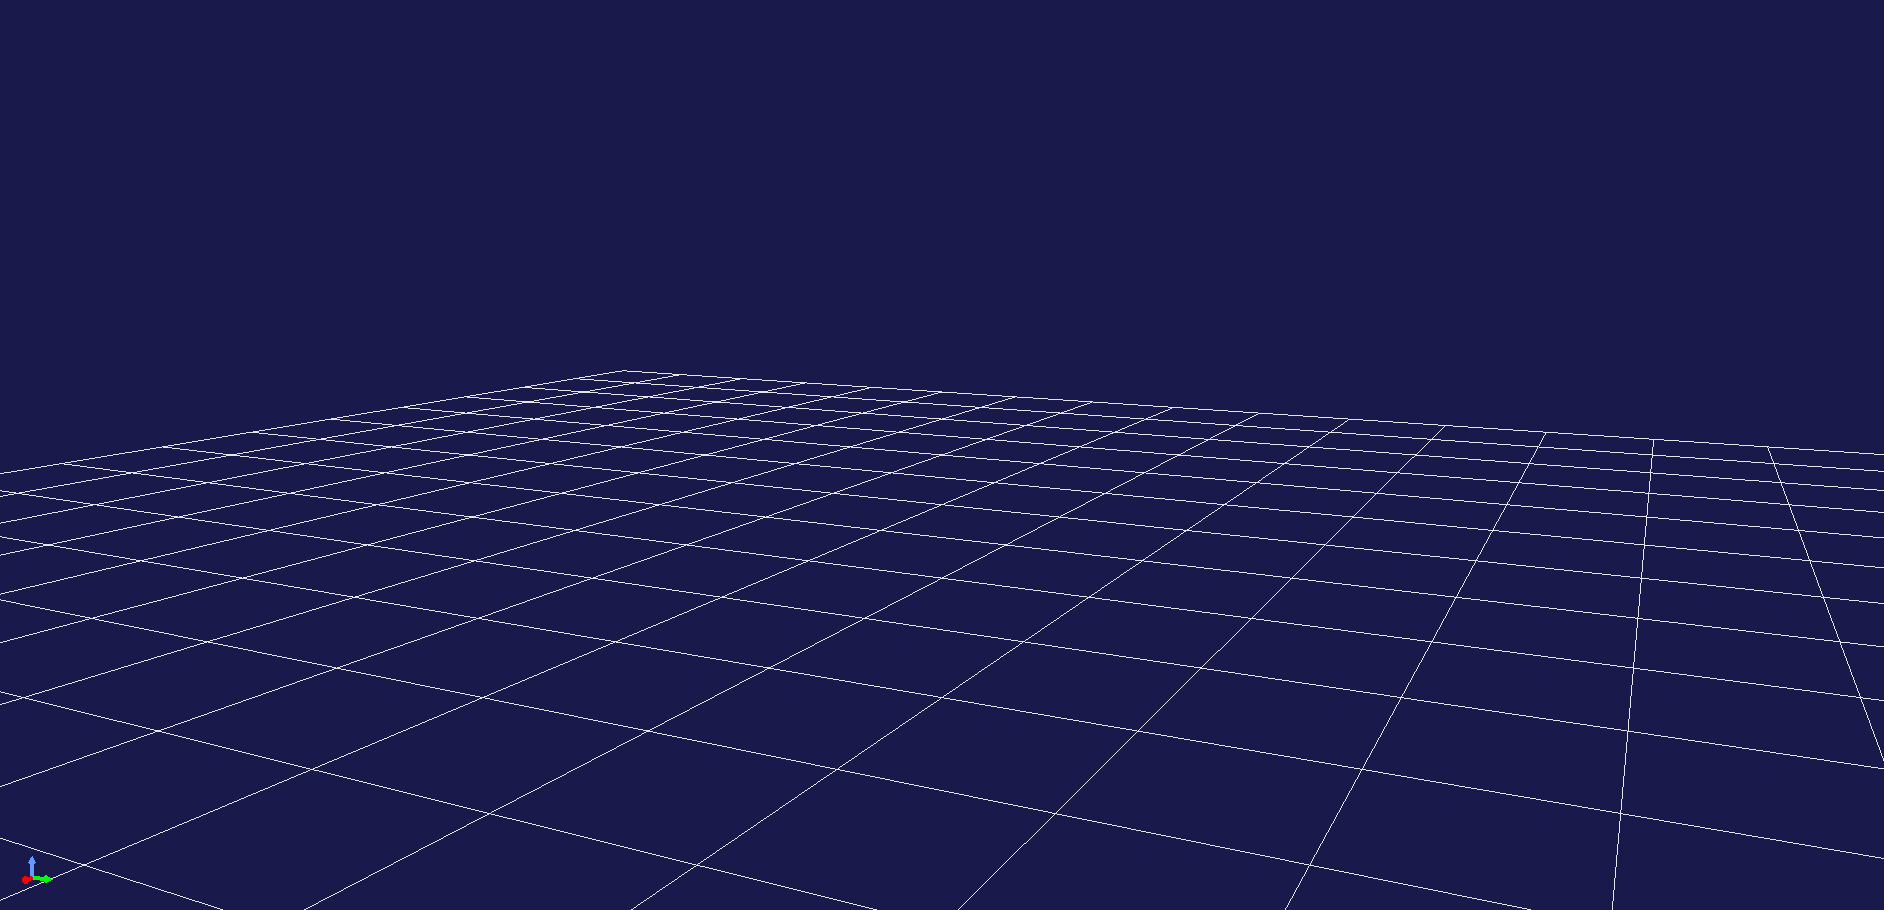

In [45]:
%display

### 座標系の表示の移動
di を、translate, rotate, transform, newcoords のメソッドで位置を変更すると、表示座標系の基準を移動させることができる。

In [46]:
cds2.translate(fv(0, 0.5, 0.5))

<coordinates[0x55813c46e2d0] -3.35355 -0.5 -1.64645 / 0 -0.382683 0 0.92388 >

In [47]:
c_cds2.newcoords(cds2)

Wrap: <coordinates[0x55813ad39420] -3.35355 -0.5 -1.64645 / 0 -0.382683 0 0.92388 > | <cnoid.Util.SgPosTransform object at 0x7fc0e8ea3630>

In [48]:
di.addObjects((c_org, c_cds2))

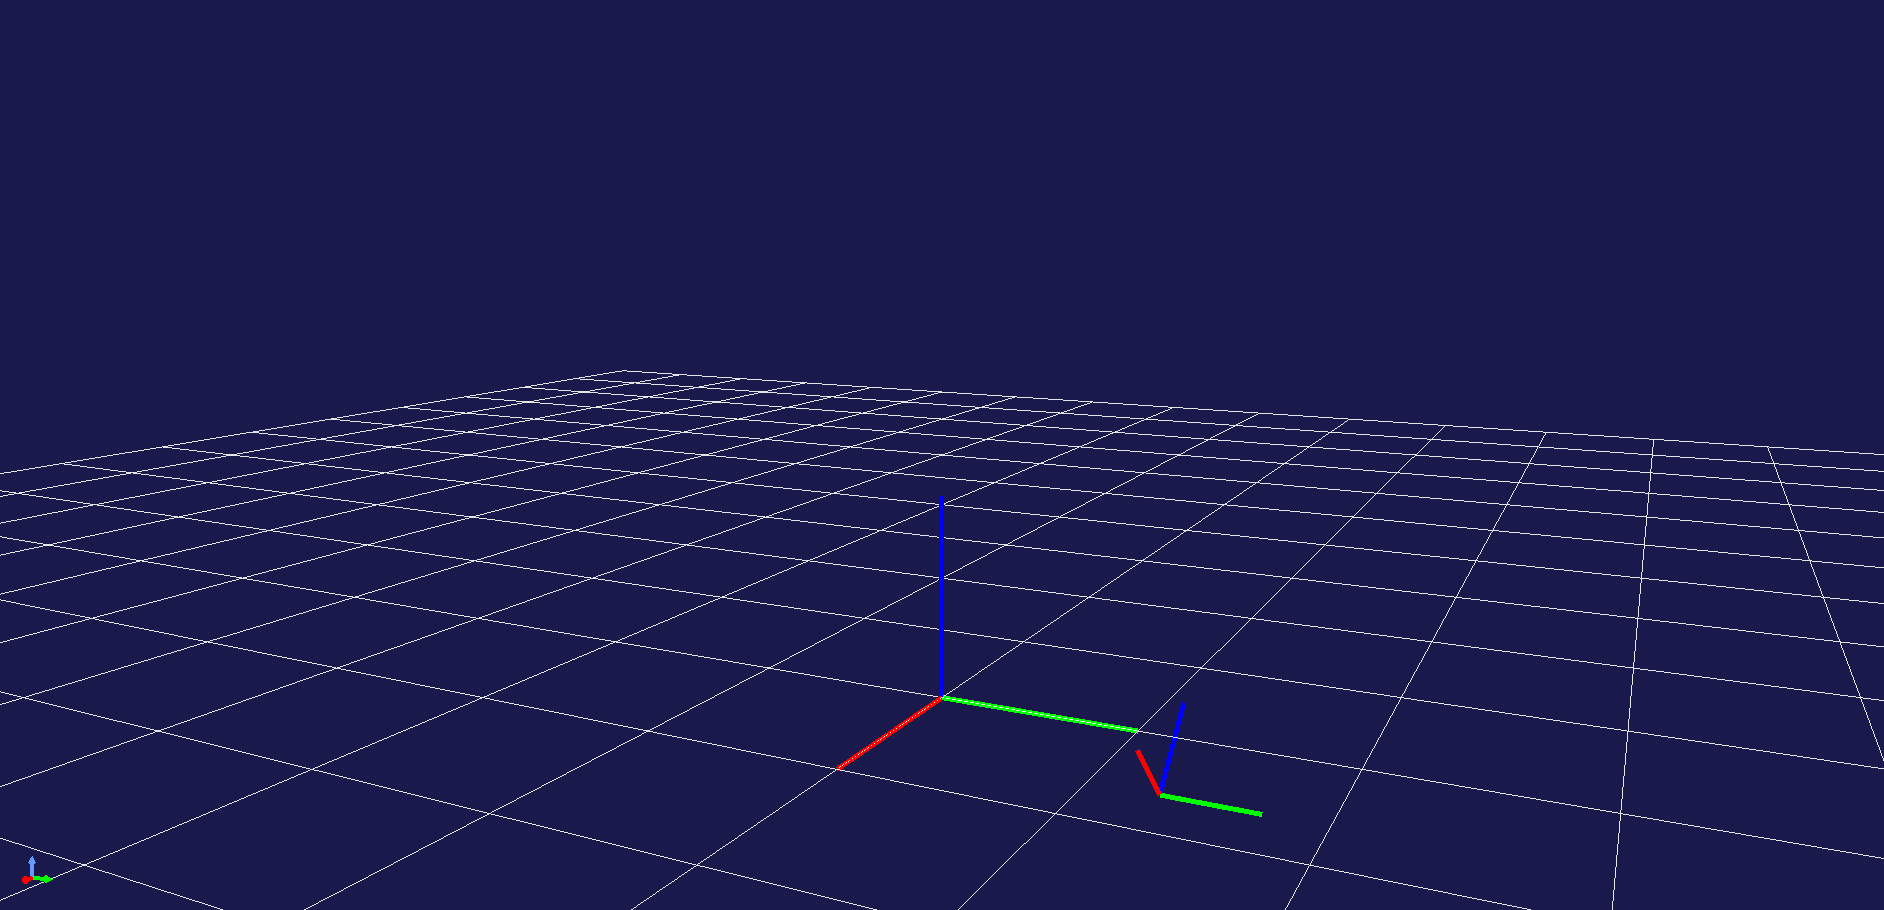

In [49]:
%display

原点を移動させます

In [50]:
di.translate(fv(0, 0, 0.6))

Wrap <class 'irsl_choreonoid.draw_coords.GeneralDrawInterfaceWrapped'> : <coordinates[0x55813c4a4280] 0 0 0.6 / 0 0 0 1 >

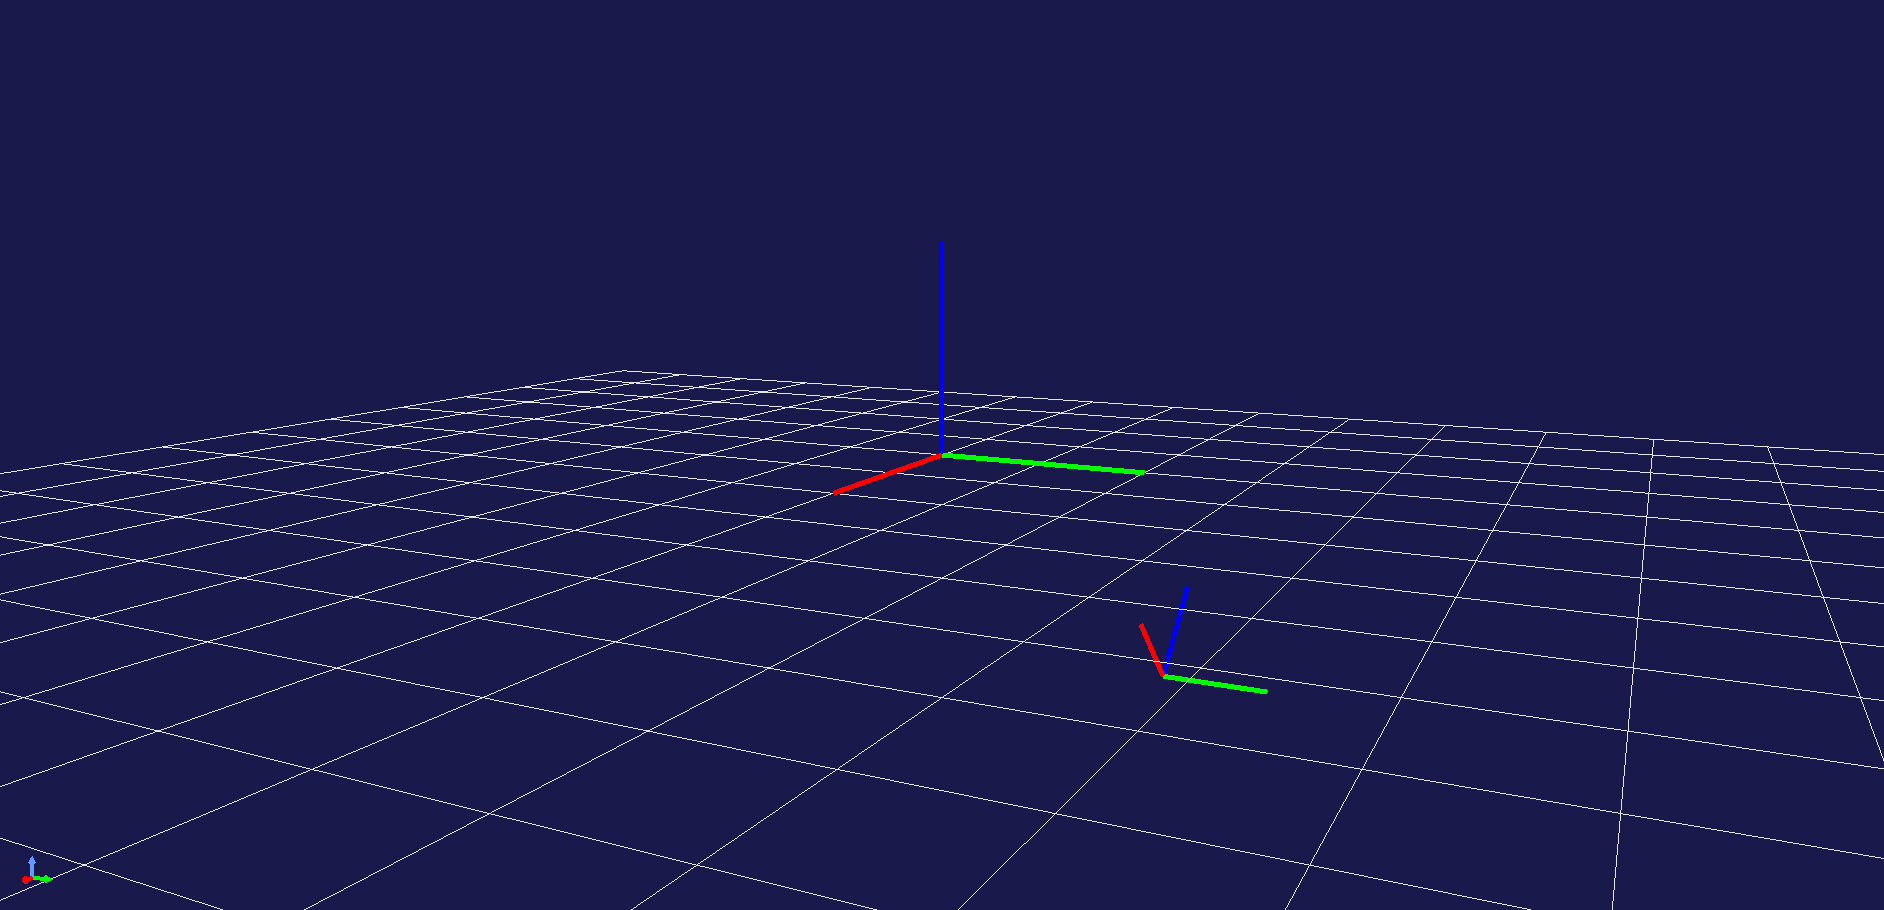

In [51]:
%display

原点を回転させます。

y軸周りにPI/4の回転

In [52]:
di.rotate(PI/8, coordinates.Y)

Wrap <class 'irsl_choreonoid.draw_coords.GeneralDrawInterfaceWrapped'> : <coordinates[0x55813c4a4280] 0 0 0.6 / 0 0.19509 0 0.980785 >

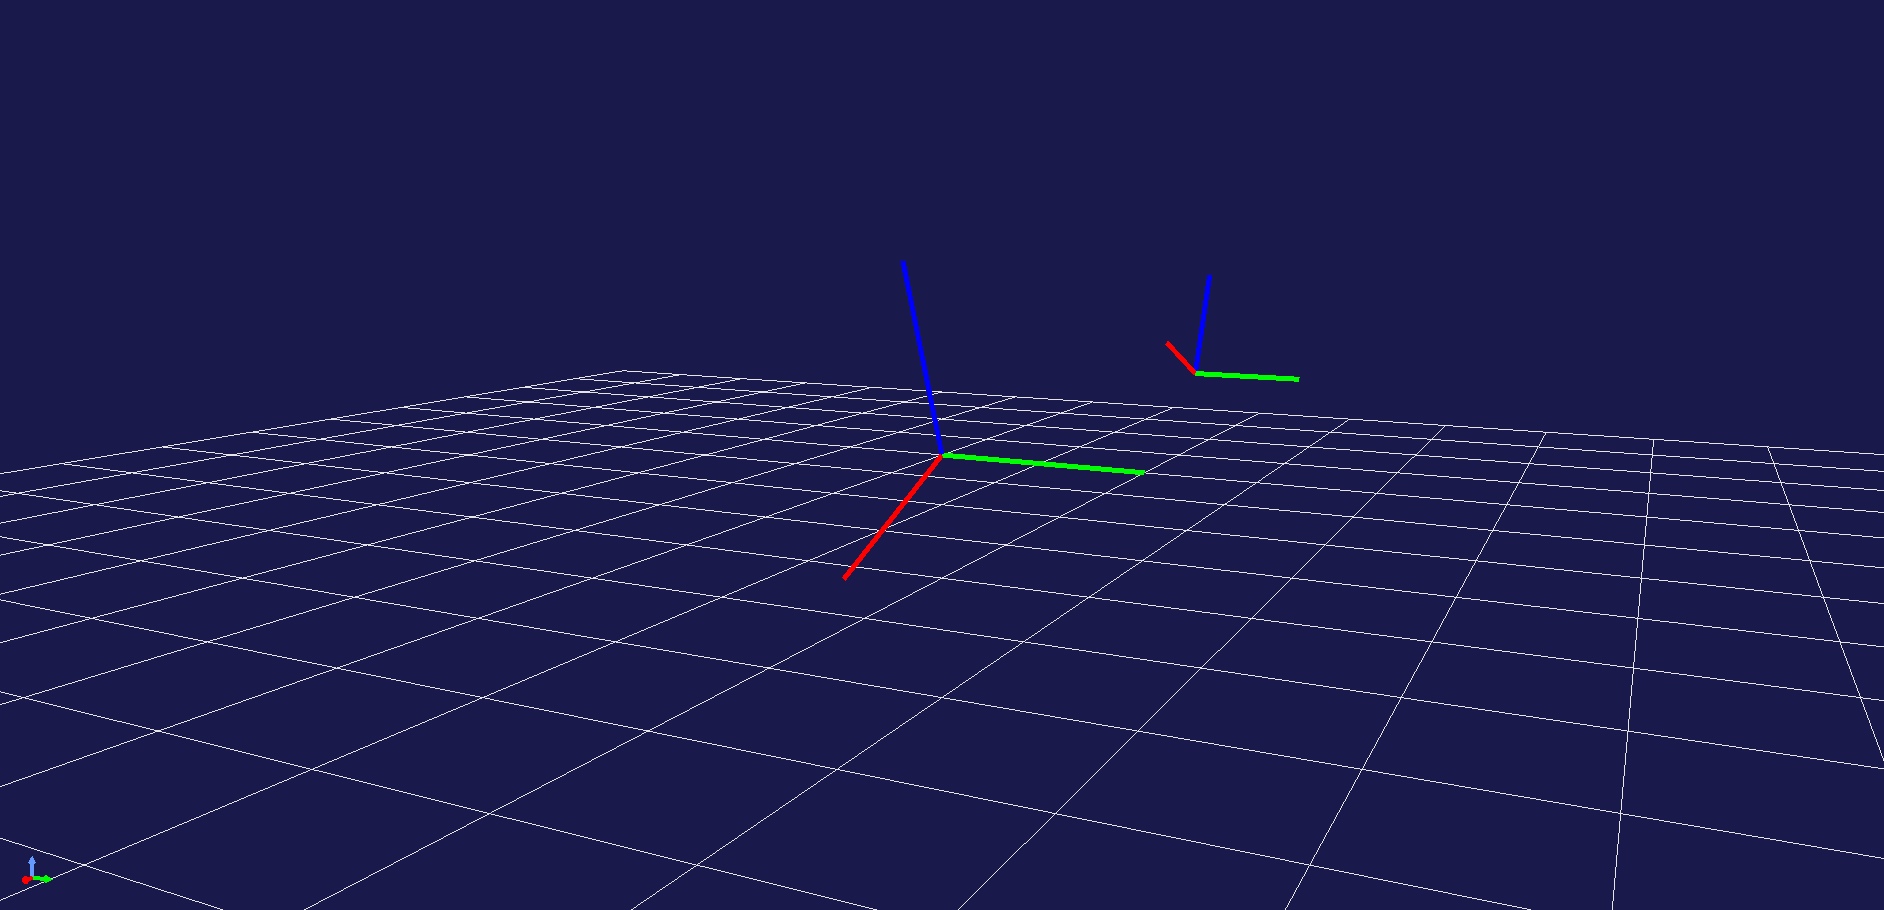

In [53]:
%display

### 表示用のオブジェクト (以下古い)
DrawCoordsを使う。

`from irsl_choreonoid.draw_coords import DrawCoordsListWrapped as DrawCoords` となっている。

DrawCoords(length, width) で表示用のオブジェクトを作成。

lengthは矢印の長さ[m], widthは矢印の太さ[pixel] となっています。

In [54]:
dc = DrawCoords(length=0.5, width=5)

In [55]:
org = coordinates()

### addCoords 表示座標の追加

In [56]:
dc.addCoords(org)

1

In [57]:
dc.addCoords(cds2)

2

### 画面のファイル化
`%display` とすると、表示画面がnotebookにダウンロードできます。

これはpythonのコマンドではありません。

本講義のchoreonoidを使ったjupyterのみで使えるコマンドです。

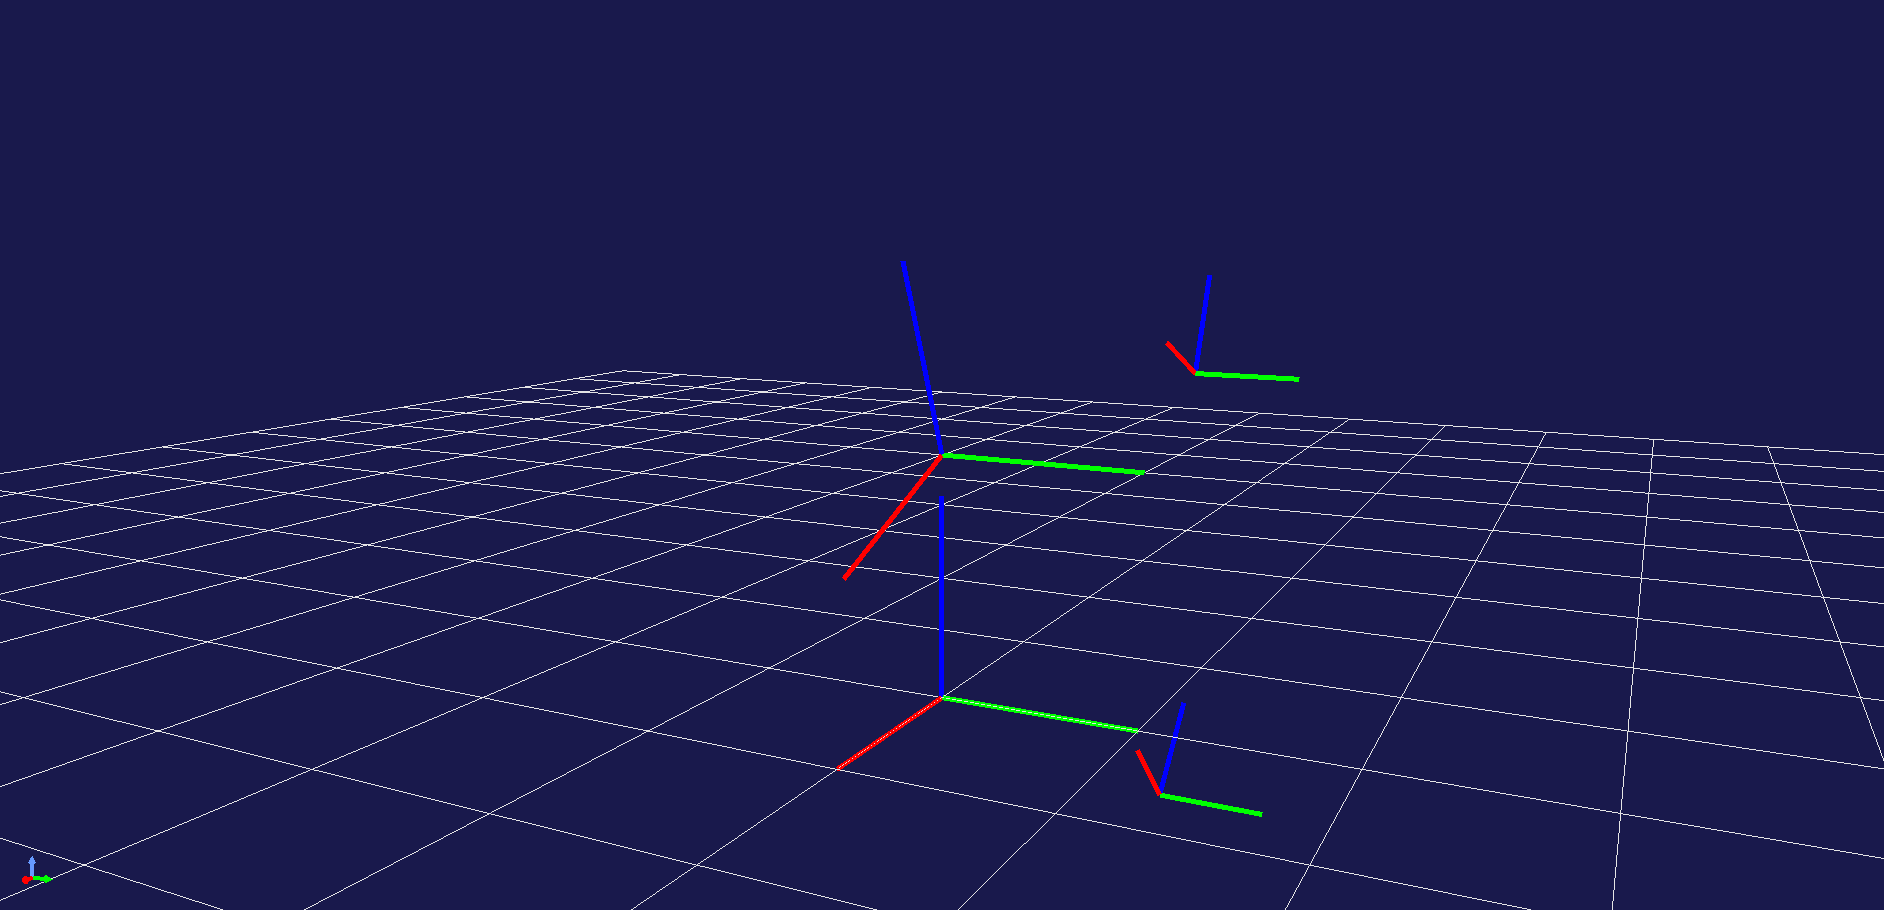

In [58]:
%display

### 座標系の表示を消す

In [59]:
dc.clear()

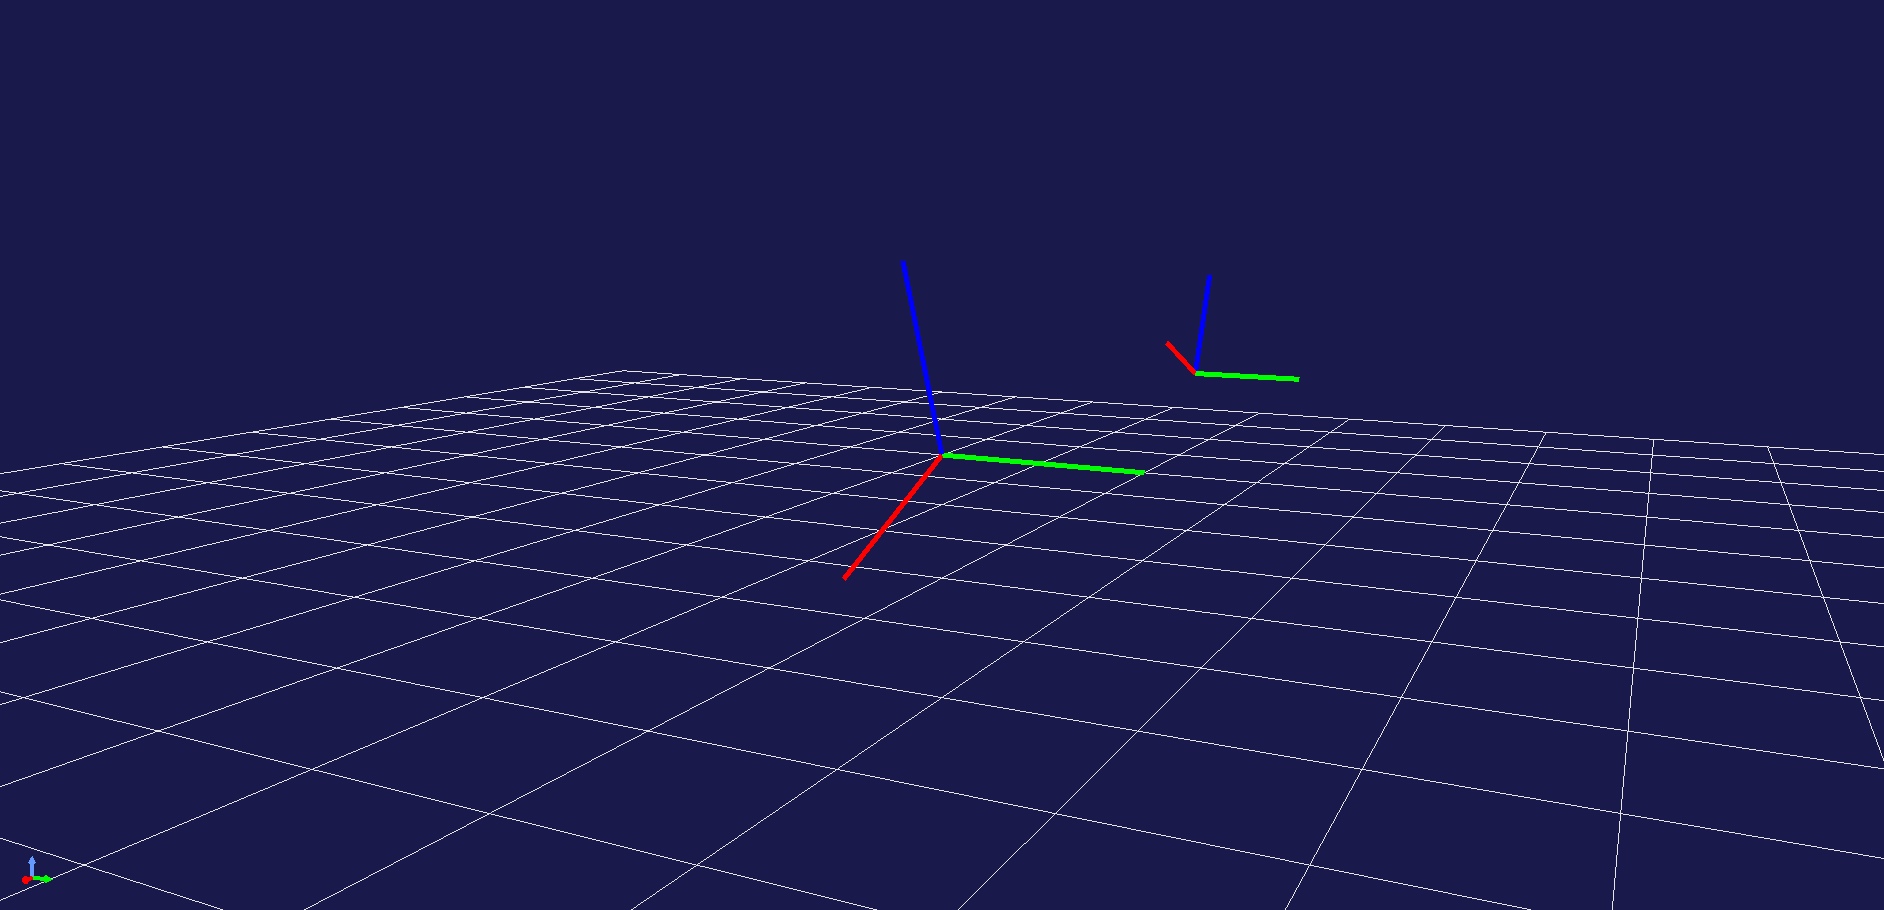

In [60]:
%display

### 座標系の表示の移動
dc を、translate, rotate, transform, newcoords のメソッドで位置を変更すると、表示座標系の基準を移動させることができる。

In [61]:
cds2.translate(fv(0, 0.5, 0.5))

<coordinates[0x55813c46e2d0] -3.70711 0 -1.29289 / 0 -0.382683 0 0.92388 >

In [62]:
dc.addCoords(coordinates())

1

In [63]:
dc.addCoords(cds2)

2

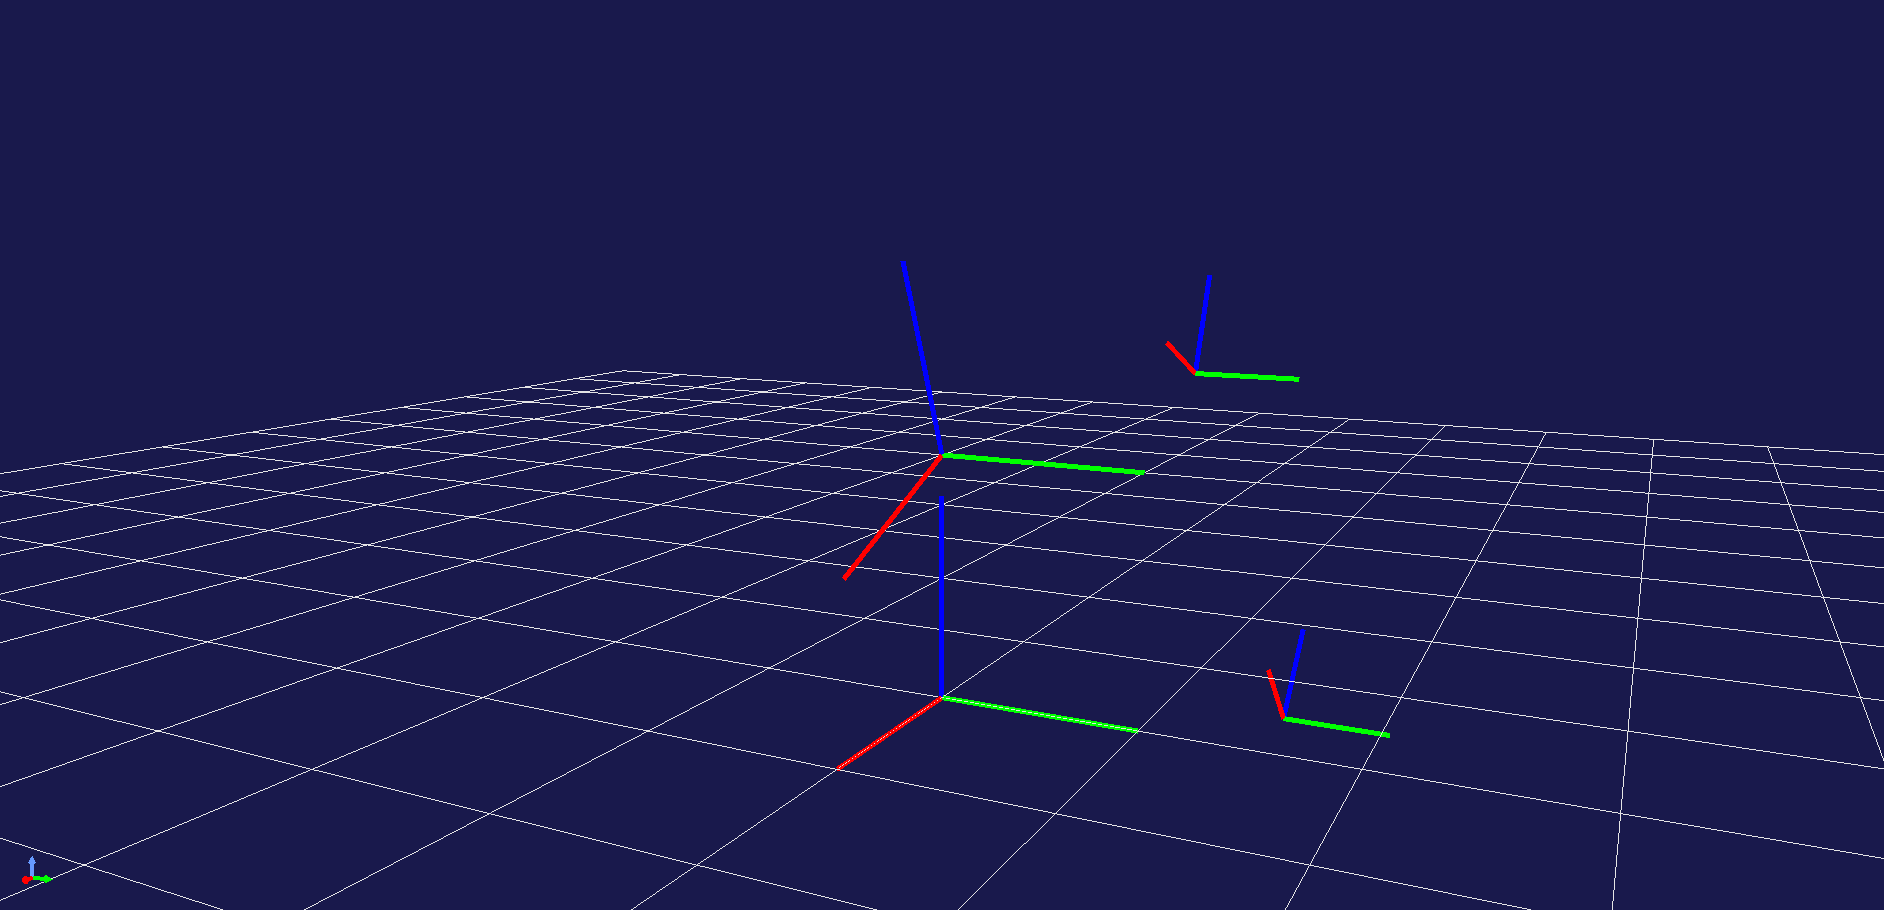

In [64]:
%display

原点を移動させます

In [65]:
dc.translate(fv(0, 0, 0.6))

Wrap <class 'irsl_choreonoid.draw_coords.DrawCoordsListWrapped'> : <coordinates[0x55813c4dbca0] 0 0 0.6 / 0 0 0 1 >

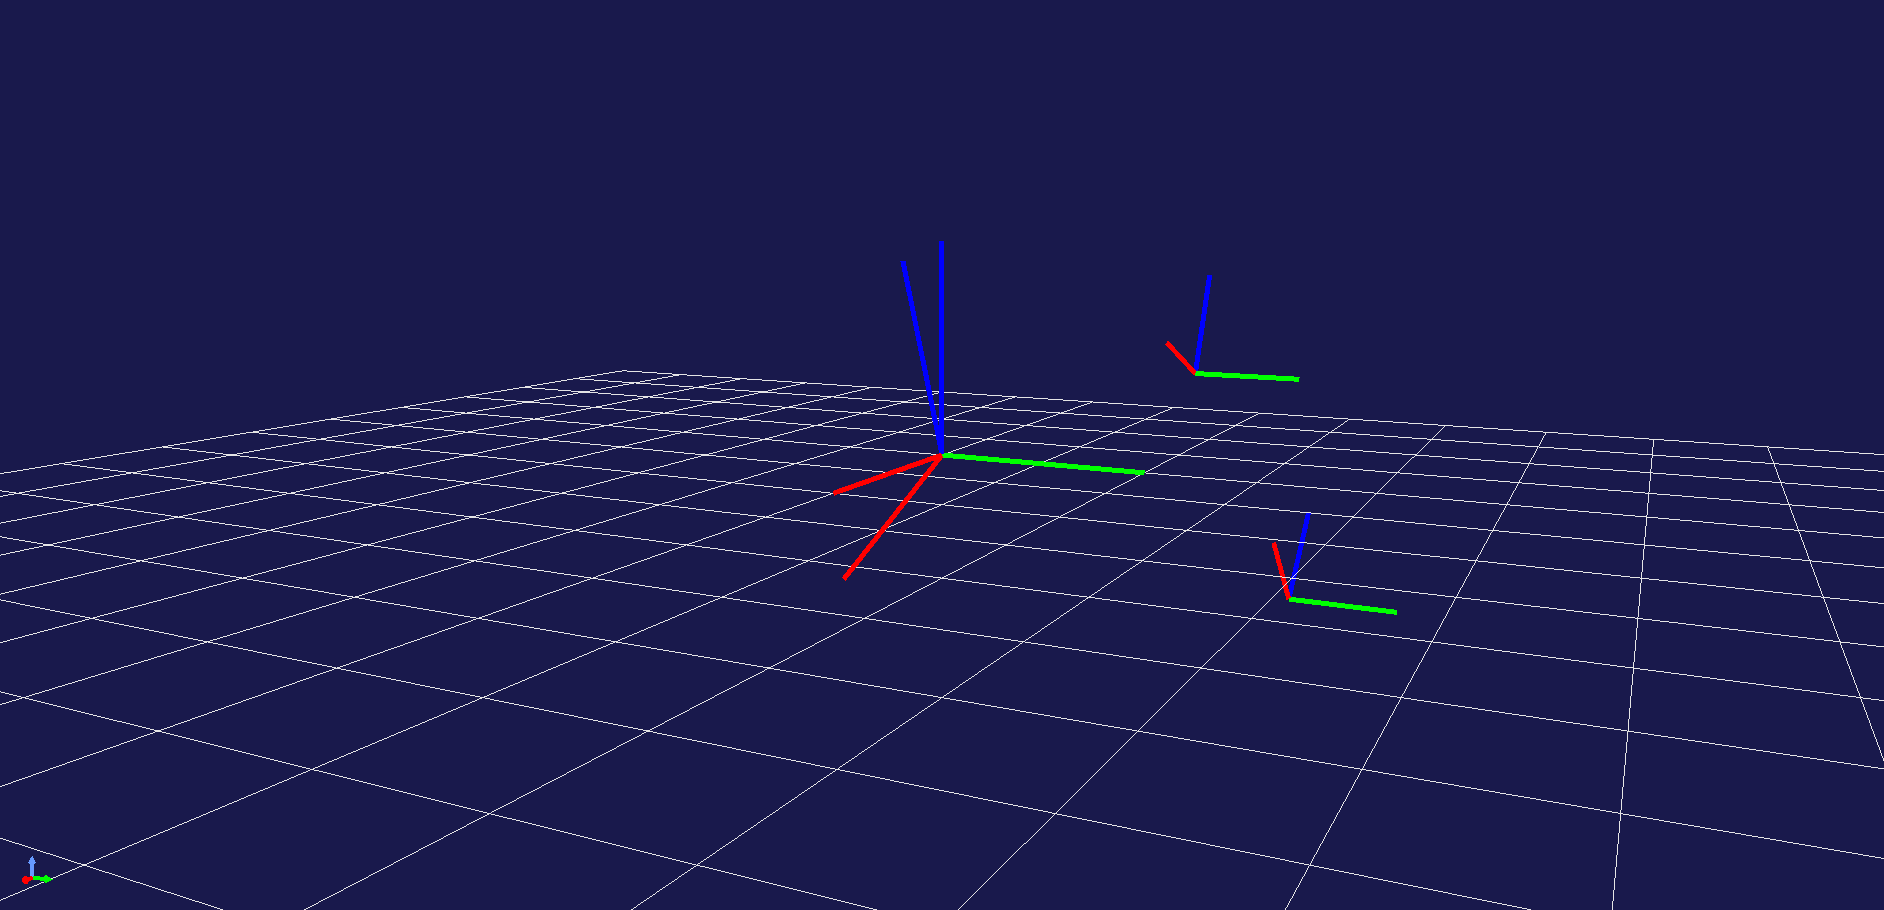

In [66]:
%display

原点を回転させます。

y軸周りにPI/4の回転

In [67]:
dc.rotate(PI/8, coordinates.Y)

Wrap <class 'irsl_choreonoid.draw_coords.DrawCoordsListWrapped'> : <coordinates[0x55813c4dbca0] 0 0 0.6 / 0 0.19509 0 0.980785 >

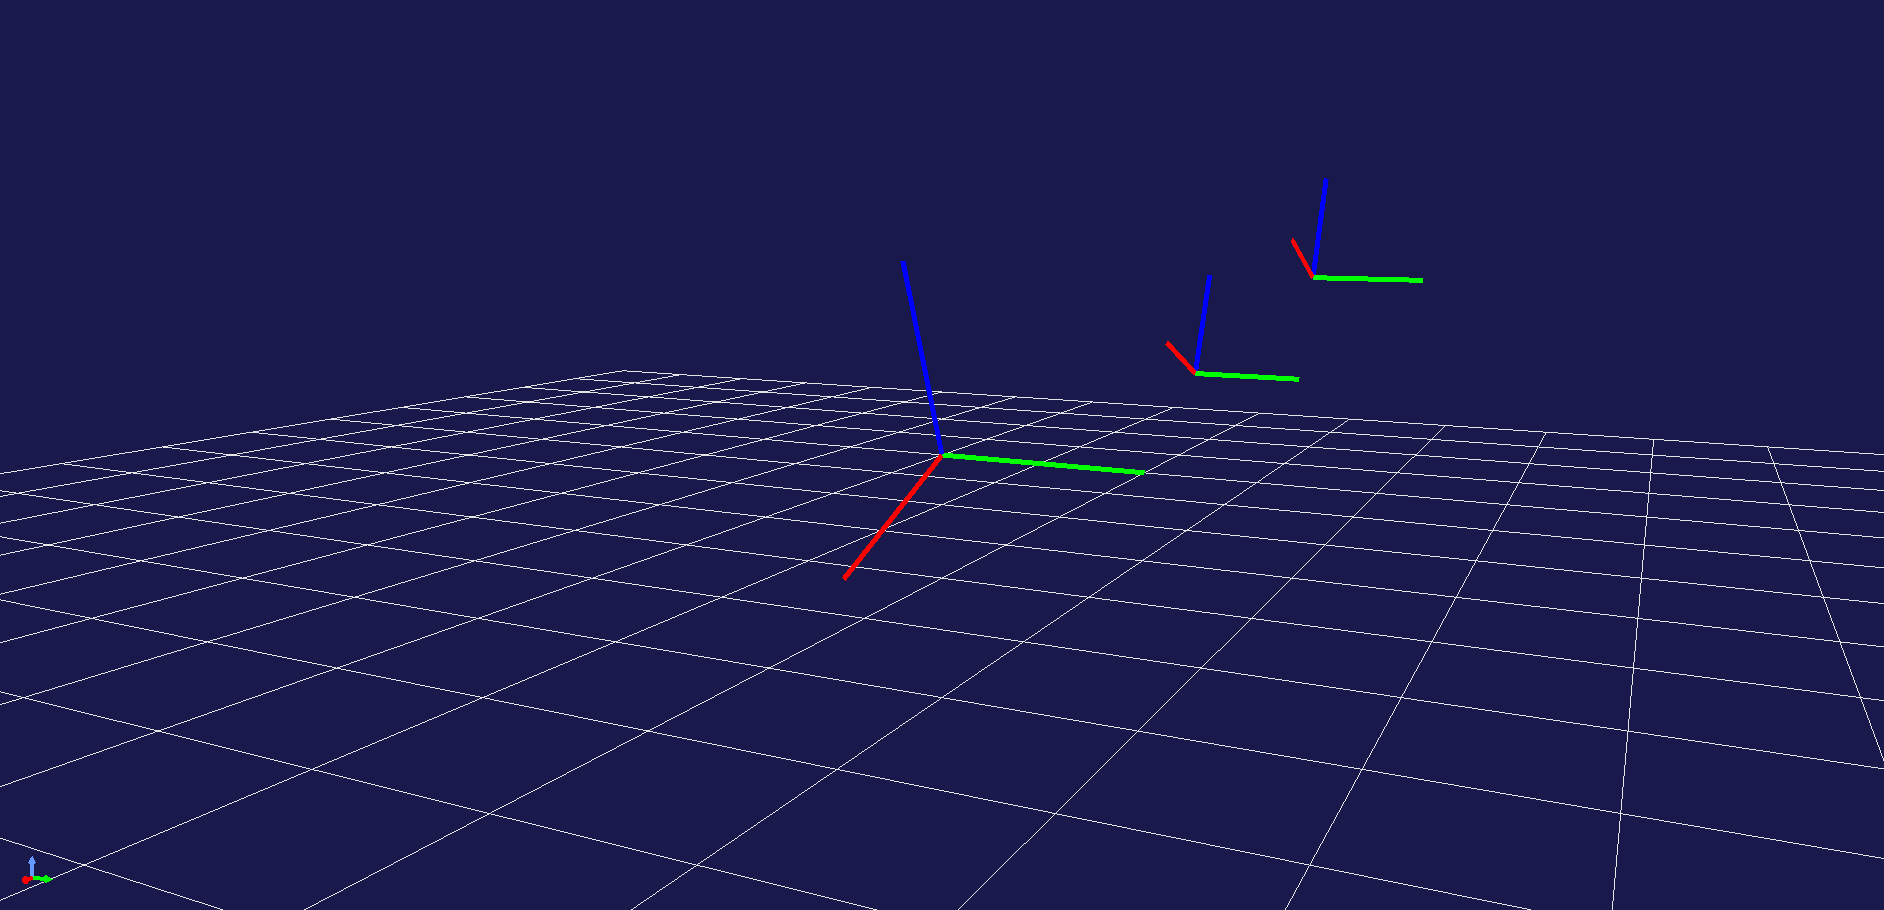

In [68]:
%display